<a href="https://colab.research.google.com/github/snimish12/Deep-Learning/blob/main/Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_dir='/content/drive/MyDrive/Deep Learning Datasets/Training'
test_dir='/content/drive/MyDrive/Deep Learning Datasets/Test'
val_dir='/content/drive/MyDrive/Deep Learning Datasets/Validation'

In [ ]:
BATCH_SIZE=8
IMG_SIZE=(128,128)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 140 files belonging to 3 classes.
Found 172 files belonging to 3 classes.
Found 172 files belonging to 3 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandalion', 'rose']


(8, 128, 128, 3)
(8,)
tf.Tensor([1 1 1 2 2 0 1 1], shape=(8,), dtype=int32)


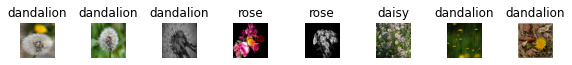

In [ ]:
# a single batch
# visulize
plt.figure(figsize=(10,6))
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    for i in range(BATCH_SIZE):
        plt.subplot(8,8,i+1)
        plt.imshow(image_batch[i]/255.0) # float [0-1],int[0-255]
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [ ]:
img=[]
label=[]
for image_batch,label_batch in train_ds:
  img.append(image_batch)
  label.append(label_batch)
inputs=np.concatenate(img)
targets=np.concatenate(label)
print(inputs.shape)
print(targets.shape)

(140, 128, 128, 3)
(140,)


In [ ]:
IMG_HEIGHT=128
IMG_WIDTH=128
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, 
                                                            input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(3,"softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])  ## loss=least mean square for regression

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=8, verbose=1)

Epoch 1/10
18/18 [==============================] - 53s 2s/step - loss: 4.0787 - accuracy: 0.3214 - val_loss: 1.0726 - val_accuracy: 0.5349
Epoch 2/10
18/18 [==============================] - 1s 52ms/step - loss: 1.1099 - accuracy: 0.3214 - val_loss: 1.0756 - val_accuracy: 0.6337
Epoch 3/10
18/18 [==============================] - 1s 37ms/step - loss: 0.9982 - accuracy: 0.6357 - val_loss: 1.0039 - val_accuracy: 0.4767
Epoch 4/10
18/18 [==============================] - 1s 38ms/step - loss: 0.9102 - accuracy: 0.5500 - val_loss: 0.9163 - val_accuracy: 0.6279
Epoch 5/10
18/18 [==============================] - 1s 38ms/step - loss: 0.8005 - accuracy: 0.6571 - val_loss: 0.8171 - val_accuracy: 0.6686
Epoch 6/10
18/18 [==============================] - 1s 36ms/step - loss: 0.7250 - accuracy: 0.6929 - val_loss: 0.8748 - val_accuracy: 0.5698
Epoch 7/10
18/18 [==============================] - 1s 37ms/step - loss: 0.6243 - accuracy: 0.7500 - val_loss: 0.6334 - val_accuracy: 0.7674
Epoch 8/10
18/

In [ ]:
loss, accuracy = model.evaluate(test_ds)

22/22 [==============================] - 20s 540ms/step - loss: 0.2876 - accuracy: 0.9186


In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

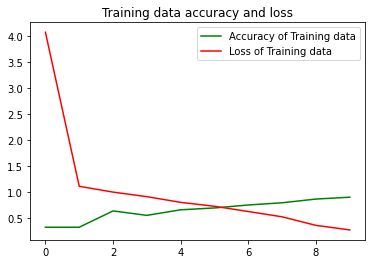

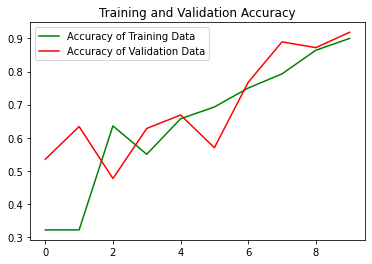

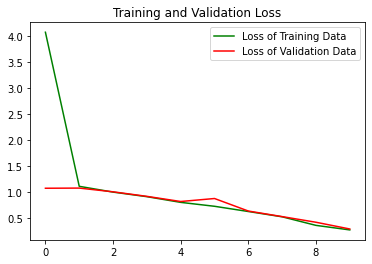

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred=model.predict(test_ds)
y_pred

array([[3.94726992e-01, 4.87795144e-01, 1.17477939e-01],
       [3.79034013e-01, 4.95173007e-01, 1.25792980e-01],
       [1.26186177e-01, 8.18128765e-01, 5.56850582e-02],
       [8.74567211e-01, 4.13476899e-02, 8.40850547e-02],
       [9.20231268e-02, 5.44280447e-02, 8.53548825e-01],
       [2.23983243e-05, 9.02464237e-08, 9.99977469e-01],
       [3.10343832e-01, 5.38262010e-01, 1.51394203e-01],
       [9.85237658e-01, 2.58403202e-03, 1.21783419e-02],
       [9.87898111e-02, 7.94308126e-01, 1.06902070e-01],
       [3.71178798e-02, 9.55229998e-01, 7.65208621e-03],
       [1.19871669e-01, 8.09433460e-01, 7.06948638e-02],
       [1.59146205e-01, 1.34931896e-02, 8.27360570e-01],
       [7.62326300e-01, 1.15388311e-01, 1.22285418e-01],
       [9.40636039e-01, 1.93416681e-02, 4.00223359e-02],
       [3.86735424e-03, 1.85935001e-04, 9.95946705e-01],
       [3.67397457e-01, 2.83418596e-01, 3.49183947e-01],
       [9.06885982e-01, 4.98181619e-02, 4.32959199e-02],
       [2.28942767e-01, 6.01783

In [ ]:
score=tf.nn.softmax(y_pred)
score


<tf.Tensor: shape=(172, 3), dtype=float32, numpy=
array([[0.35021338, 0.38437194, 0.26541469],
       [0.34489504, 0.38736954, 0.2677354 ],
       [0.25448406, 0.50835544, 0.2371605 ],
       [0.5295842 , 0.23018256, 0.2402332 ],
       [0.24362649, 0.23463736, 0.52173615],
       [0.21194805, 0.21194333, 0.57610863],
       [0.32164457, 0.40397996, 0.27437544],
       [0.57069755, 0.2136215 , 0.21568093],
       [0.24919678, 0.4995767 , 0.25122654],
       [0.22343765, 0.5596124 , 0.21694992],
       [0.25349477, 0.505175  , 0.24133024],
       [0.26210886, 0.22658199, 0.51130915],
       [0.48758662, 0.25532317, 0.25709024],
       [0.55422425, 0.22058322, 0.22519253],
       [0.21307597, 0.21229298, 0.57463104],
       [0.34466097, 0.31689876, 0.3384403 ],
       [0.541697  , 0.22989877, 0.2284042 ],
       [0.29464376, 0.42777947, 0.27757686],
       [0.5065267 , 0.2405155 , 0.2529578 ],
       [0.2284403 , 0.22031619, 0.55124354],
       [0.24570923, 0.22687913, 0.52741164],
     

In [ ]:
y_p=np.argmax(score,axis=1)
y_p


array([1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0,
       1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1])

In [ ]:
final_y_pred=class_names[y_p[1]]  
final_y_pred

'dandalion'

In [ ]:
class_names

['daisy', 'dandalion', 'rose']

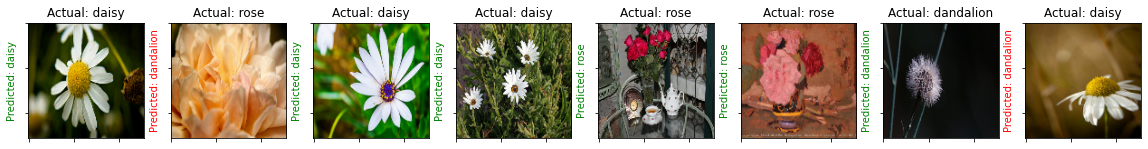

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
#plt.figure(figsize=(20, 20))
p=[]
t=[]
for images, labels in test_ds.take(1):
    for i in range(8):
        #ax = plt.subplot(8, 8, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        p.append(np.argmax(score))
        t.append(labels[i])

In [ ]:
#plt.figure(figsize=(20, 20))
p=[]
t=[]
for images, labels in test_ds:
    
        #ax = plt.subplot(8, 8, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(images)
        score = np.argmax(tf.nn.softmax(predictions),axis=1)
        p.append(score)
        t.append(labels)
        

In [ ]:
p1=np.concatenate(p)
t1=np.concatenate(t)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(t1,p1)
cm

array([[52,  5,  1],
       [ 2, 54,  0],
       [ 4,  2, 52]])

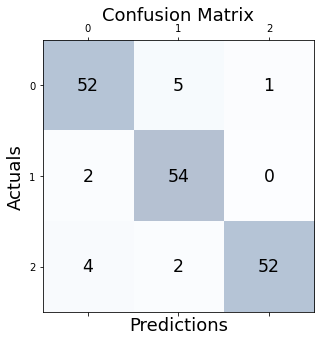

In [ ]:
conf_matrix=cm
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
z=(p1!=t1).sum()
z

14

In [ ]:
p1!=t1


array([False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
#plt.figure(figsize=(20, 20))
p_train=[]
t_train=[]
for images, labels in train_ds:
    
        #ax = plt.subplot(8, 8, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(images)
        score = np.argmax(tf.nn.softmax(predictions),axis=1)
        p_train.append(score)
        t_train.append(labels)

In [ ]:
#plt.figure(figsize=(20, 20))
p_val=[]
t_val=[]
for images, labels in val_ds:
    
        #ax = plt.subplot(8, 8, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(images)
        score = np.argmax(tf.nn.softmax(predictions),axis=1)
        p_val.append(score)
        t_val.append(labels)

In [ ]:
p_train1=np.concatenate(p_train)
t_train1=np.concatenate(t_train)
p_val1=np.concatenate(p_val)
t_val1=np.concatenate(t_val)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(t_train1,p_train1)
cm

array([[45,  1,  0],
       [ 0, 45,  0],
       [ 0,  0, 49]])

In [ ]:
cm=confusion_matrix(t_val1,p_val1)
cm

array([[52,  5,  1],
       [ 2, 54,  0],
       [ 4,  2, 52]])

(128, 128, 3)


Text(0.5, 1.0, 'rose')

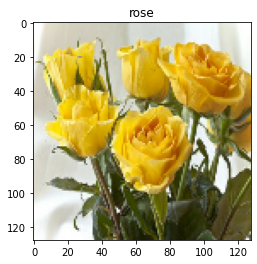

In [ ]:
i=2 # test image
im=images[i]
L=labels[i]
print(im.shape)
plt.imshow(im/255)
plt.title(class_names[L])

In [ ]:
im1=tf.expand_dims(im,axis=0)
P=model.predict(im1)

In [ ]:
P
print('Prob=',np.argmax(P[0]))
print('Label=',np.argmax(P[0]))
print('Class=',np.argmax(P[0]))

Prob= 2
Label= 2
Class= 2


(128, 128, 3)
[0.379034   0.495173   0.12579298]
Predicted Label 1
Predicted Class Dendlion
Probability 49.517300724983215


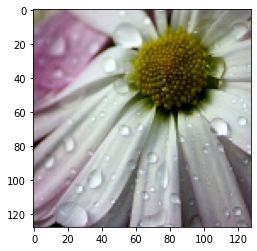

In [ ]:
i=1  # test image
im=images[i]
print(im.shape)
plt.imshow(im/255.0)
class_name=['Daisy','Dendlion','Roses']
print(y_pred[i])
print('Predicted Label',tf.argmax(y_pred[i]).numpy())
print('Predicted Class',class_name[tf.argmax(y_pred[i]).numpy()])
#print('Target Class', class_name[test_label[i]])
print('Probability',tf.reduce_max(y_pred[i]).numpy()*100)

In [ ]:
import PIL
dir = '/content/drive/MyDrive/Deep Learning Datasets/rosess.jpeg'
PIL.Image.open(dir)

In [ ]:
import cv2
dir = '/content/drive/MyDrive/Deep Learning Datasets/rosess.jpeg'
img = cv2.imread(dir)
print(img.shape)
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
#keras prepossing layer
import tensorflow as tf
dir = '/content/drive/MyDrive/Deep Learning Datasets/rosess.jpeg'
img = tf.keras.preprocessing.image.load_img(dir,target_size=(128,128))
img =tf.keras.preprocessing.image.img_to_array(img)
img = img/255.0
print(img)
plt.imshow(img) #float[0-1]
print(img.shape)

In [ ]:
img.shape

In [ ]:
img1 = tf.expand_dims(img,axis =0)
print(img1.shape)
p = model.predict(img1)
p
print(('Prob',np.max(P[0])))
print('Labels',np.argmax(P[0]))
plt.imshow(img)
print("class = ",class_names[np.argmax(P[0])])